# 데이터 로드 및 확인

In [ ]:
import pandas as pd
import tensorflow as tf
df = pd.read_csv('https://github.com/kairess/toy-datasets/raw/master/temps.csv', encoding='euc-kr')
X = df.drop(columns=['지점', '지점명','지면온도(°C)'])
Y = df['기온(°C)']
df.head()

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9


In [ ]:
df.columns

Index(['지점', '지점명', '일시', '기온(°C)', '지면온도(°C)'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        8782 non-null   int64  
 1   지점명       8782 non-null   object 
 2   일시        8782 non-null   object 
 3   기온(°C)    8779 non-null   float64
 4   지면온도(°C)  8782 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 343.2+ KB


In [ ]:
df.describe()

,지점,기온(°C),지면온도(°C)
count,8782.0,8779.000000,8782.000000
mean,232.0,12.229343,14.097814
std,0.0,10.121243,11.560741
min,232.0,-16.000000,-8.700000
25%,232.0,3.700000,3.400000
50%,232.0,12.600000,14.100000
75%,232.0,21.100000,23.300000
max,232.0,33.800000,51.600000


dataframe to numpy array

In [ ]:
data = df[[ '기온(°C)']].to_numpy()
target = df['지면온도(°C)'].to_numpy()

split train_set, test_set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.8, random_state=42)

check the set shape

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1756, 1)
(1756,)
(7026, 1)
(7026,)


# StandardScaler, 전처리


In [ ]:
from sklearn.preprocessing import StandardScaler # 정규화 하는 거
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
# y_train_scaled = scaler.transform(y_train)  # Remove this line - don't scale the target variable

X_test_scaled = scaler.transform(X_test)
# y_test_scaled = scaler.transform(y_test)  # Remove this line - don't scale the target variable

In [ ]:
# 정규화
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values (NaN) with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the scaled training data and transform both training and testing data
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

In [ ]:
# Now create and fit the model using the imputed data
model = LinearRegression()
model.fit(X_train_scaled_imputed, y_train)  # Use y_train, not X_test_scaled

LinearRegression()

In [ ]:
print(model.score(X_train_scaled_imputed, y_train))
print(model.score(X_test_scaled_imputed, y_test))

0.9071990834932966
0.9013958529500761


# 새 섹션

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


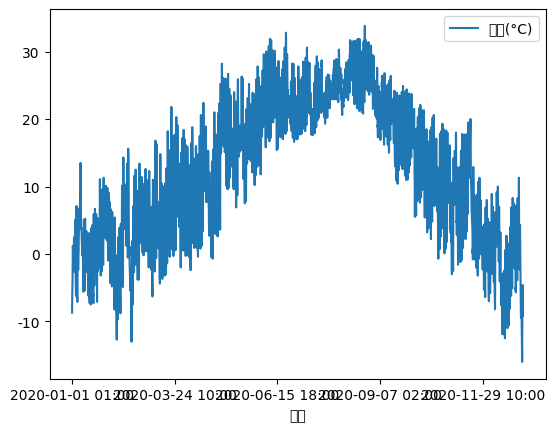

In [ ]:
# 무슨 데이터인지 확인하기
import matplotlib.pyplot as plt
import pandas as pd # import pandas to use plotting function

# Assuming 'df' is your DataFrame, you can plot a specific column like this:
df.plot(x='일시', y='기온(°C)',)

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


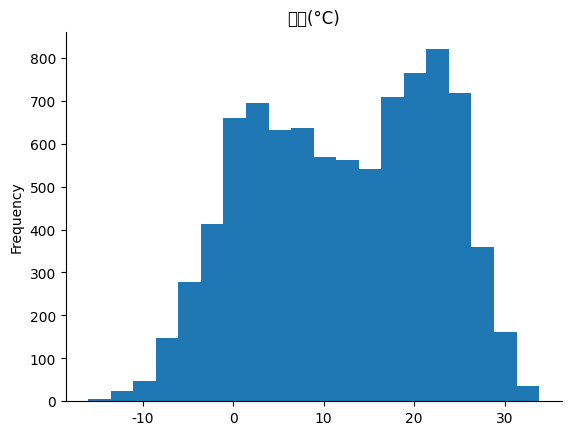

In [ ]:
# title 기온(°C)

from matplotlib import pyplot as plt
df['기온(°C)'].plot(kind='hist', bins=20, title='기온(°C)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# data 전처리

X = df.drop(columns=['지점', '지점명','지면온도(°C)'])

y = df['기온(°C)'] # 장르명

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1756, 1)
(1756,)
(7026, 1)
(7026,)


어려운 점
변수가 날짜, 지면온도, 온도 이렇게 3개라
이 중에 어떤 것들의 상관관계륿 봐야 할 지 모르겠다.

1. 1월에 지면 온도, 온도

visualize data with graph
loss w2, h1,
sgd
loss를 구하는데, 제일 적은 숫자를 구하기 위해 use sgd
w1-f'x, local minima, global minima
= find at least loss, sgd
1. random w, caculate e, with w
3. update w by sgd

In [ ]:
# f'x - learning rate, not f'x
# changing learning rate, we can find least loss
# learning rate optimizer, mome--

In [ ]:
# data 전처리

X = df.drop(columns=['지점', '지점명']) # '지면온도(°C)' is no longer dropped

y = df['기온(°C)']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(7025, 3) (7025,)
(1757, 3) (1757,)


코드 **고치기**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Load your data (replace with your data loading logic)
import pandas as pd

# Load your data as pandas DataFrames
X = pd.read_csv('https://github.com/kairess/toy-datasets/raw/master/temps.csv', encoding='euc-kr')
# Assuming '기온(°C)' is the column you want to predict
y = pd.read_csv('https://github.com/kairess/toy-datasets/raw/master/temps.csv', encoding='euc-kr')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('https://github.com/kairess/toy-datasets/raw/master/temps.csv', encoding='euc-kr')

# Exclude '일시', '지점', and '지점명' columns from features
X = df.drop(columns=['기온(°C)', '지점', '지점명', '일시'])
y = df['기온(°C)']

y = y.dropna()
X = X.loc[y.index]

# Split the data after dropping irrelevant columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(" mse:", mse)

 예측의 정확도: 9.23843433213128


In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9021067404430081
0.9067290298758941


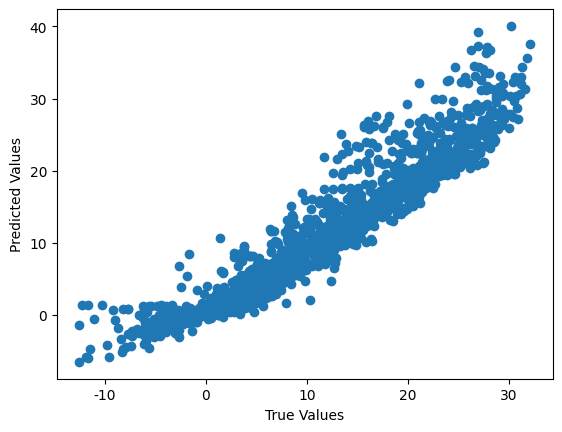

In [ ]:
# prompt: draw me a graph with pyplot on the code

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [ ]:
import torch.nn as nn


In [ ]:
model = nn.Linear(1, 1) # single linear

print(model)

NameError: name 'nn' is not defined